<a href="https://colab.research.google.com/github/sonu9479/Bike-Sharing-Demand-Prediction/blob/main/Bike_sharing_demand_prediction_ML_regression_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike sharing demand prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Vivek Singh
**Cohort** - London

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

GitHub Link - https://github.com/sonu9479/Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Loading Dataset using Github link.
Data_url = 'https://raw.githubusercontent.com/sonu9479/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv'
data = pd.read_csv(Data_url, encoding= 'unicode_escape')

### Dataset First View

In [3]:
# Dataset First Look (first five rows)
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 8760 rows and 14 columns


### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f'There are {len(data[data.duplicated()])} duplicate values in dataset.')

# As we can see there are no duplicate values in the Dataset.

There are 0 duplicate values in dataset.


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
data.isna().sum()

# No Missing Values/Null Values found in dataset.

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# Dataset Description
data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [10]:
# Checking Unique Values for each variable
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [13]:
import datetime as dt
# We can see that the Date variable is in object datatype, we need to change it into datetime datatype
data['Date'] = data['Date'].astype(np.datetime64)

data['month'] = data['Date'].dt.month

data['day'] = data['Date'].dt.day_name()

# data['weekend'] = data['day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0 )


In [14]:
data.drop(['Date'],axis = 1, inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [16]:
data[['Seasons']].value_counts()

Seasons
Spring     2208
Summer     2208
Autumn     2184
Winter     2160
dtype: int64

In [17]:
# data['Holiday'] = data['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
# data['Functioning Day'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
# data = pd.get_dummies(data, columns = ['Seasons'])


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [20]:
len(data.columns)

15

In [21]:
numerical_data = list(set(data.describe().columns.tolist()) - {'Hour','month'})
numerical_data

['Rented Bike Count',
 'Humidity(%)',
 'Solar Radiation (MJ/m2)',
 'Dew point temperature(°C)',
 'Temperature(°C)',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Snowfall (cm)']

In [22]:
categorical_data = list(set(data.columns)-set(numerical_data))
categorical_data

['Holiday', 'day', 'Functioning Day', 'Seasons', 'month', 'Hour']

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

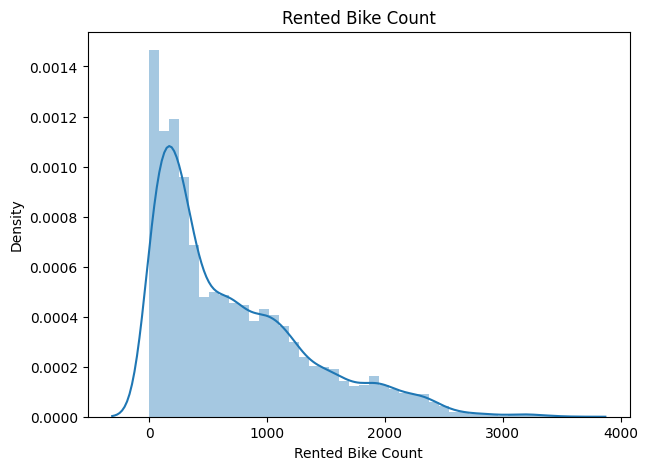

In [23]:
# Chart - 1 visualization code

plt.figure(figsize=(7,5))
plt.title('Rented Bike Count')
sns.distplot(data['Rented Bike Count'] )
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [24]:
# Chart - 2 visualization code
# for i in numerical_data:
#     plt.figure(figsize=(12,6))
#     plt.title(i)
#     sns.distplot(data[i] )
#     plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [25]:
# Chart - 3 visualization code
# for i in categorical_data:
#     plt.figure(figsize=(12,6))
#     plt.title(i)
#     sns.barplot(x = data[i], y = data['Rented Bike Count'])
#     plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

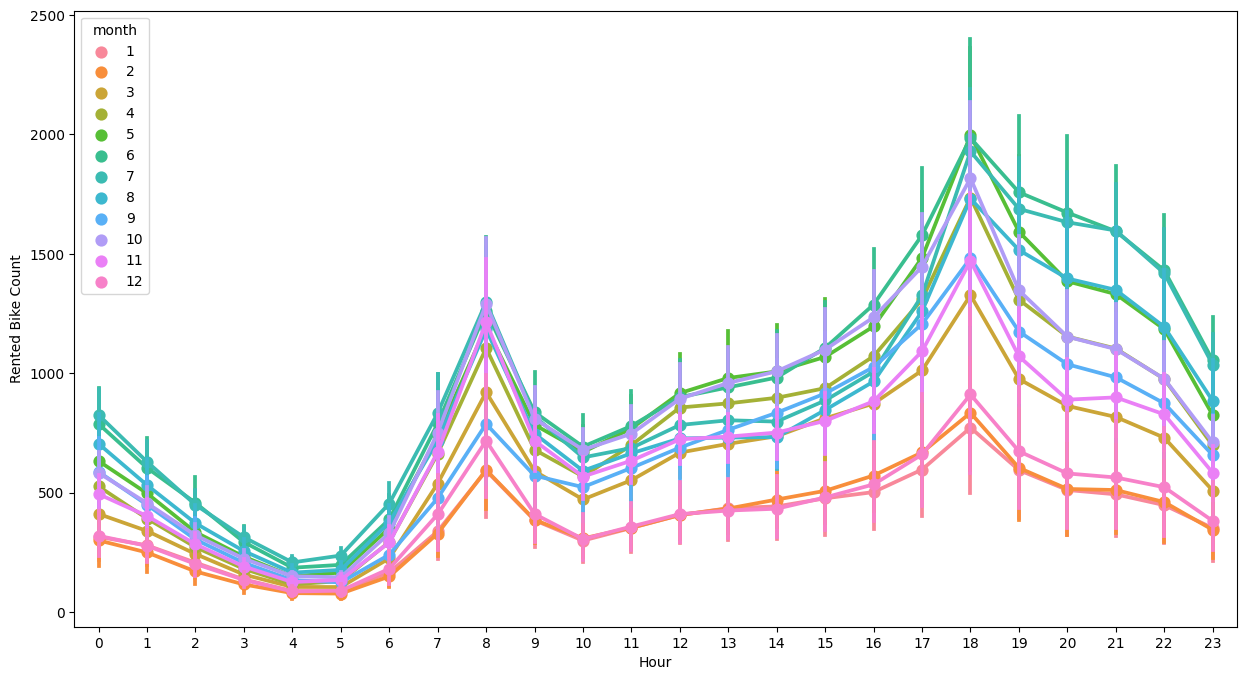

In [26]:
# Chart - 4 visualization code
plt.figure(figsize = (15,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['month'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

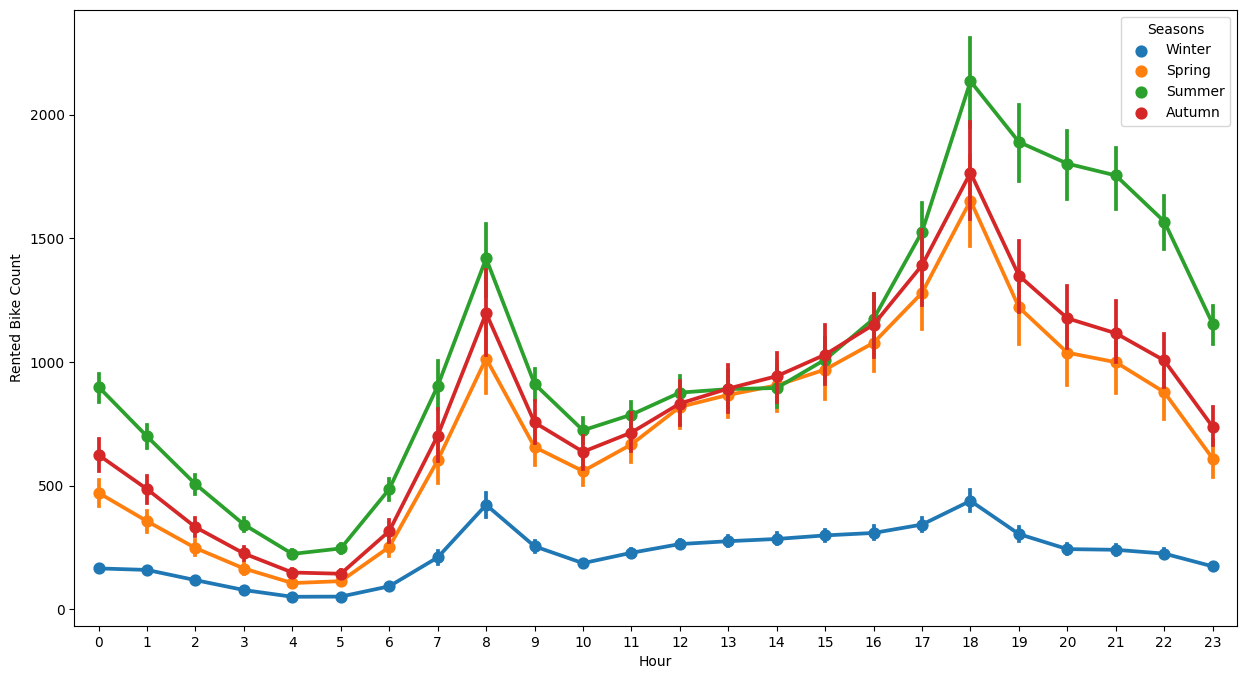

In [27]:
# Chart - 5 visualization code
plt.figure(figsize = (15,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['Seasons'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

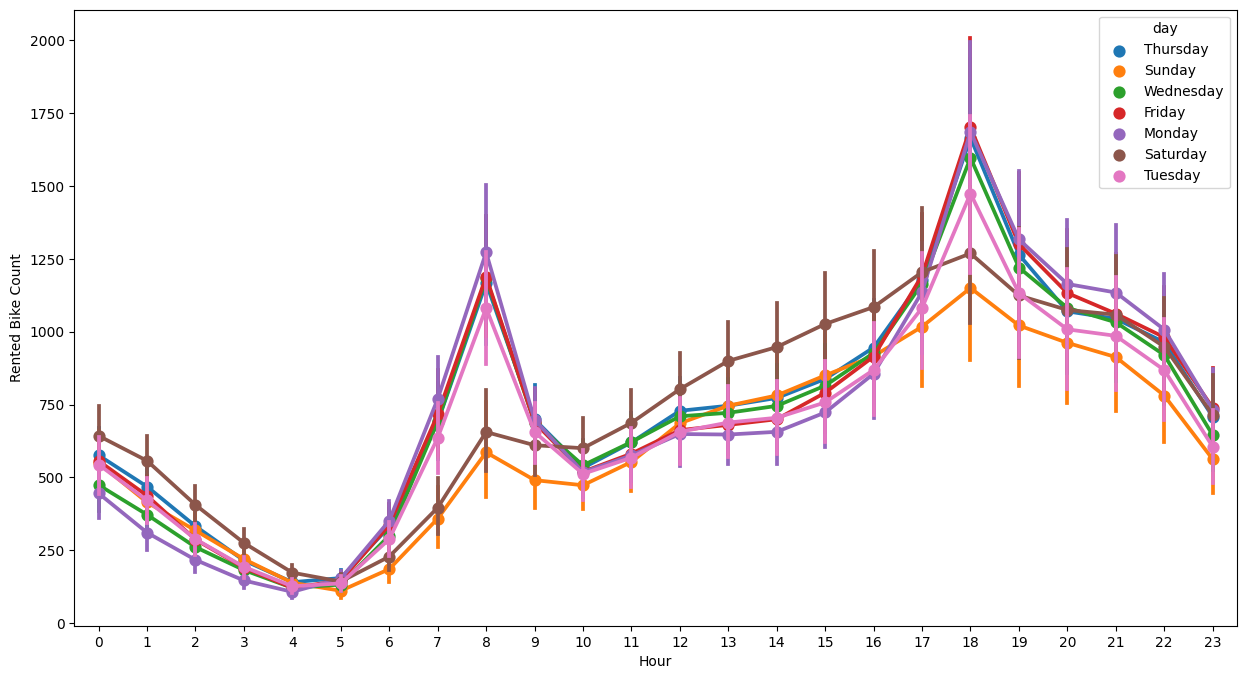

In [28]:
# Chart - 6 visualization code
plt.figure(figsize = (15,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['day'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

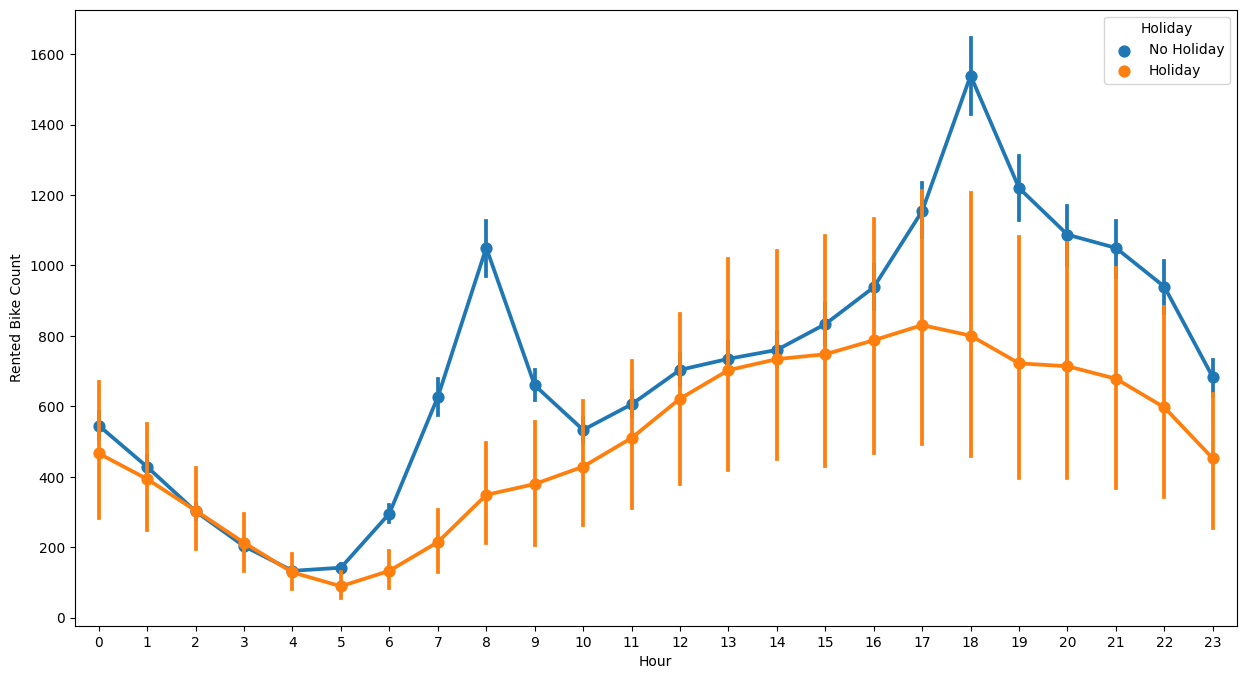

In [29]:
# Chart - 7 visualization code
plt.figure(figsize = (15,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['Holiday'])

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [30]:
# Chart - 8 visualization code
# for i in numerical_data:
#   plt.figure(figsize = (8,6))
#   sns.boxplot(x = data[i])
#   plt.title(i)

#   plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [31]:
# Chart - 9 visualization code
# for i in numerical_data:
#   if i not in ['Rented Bike Count']:
#     fig = plt.figure(figsize = (10,8))
#     fig = plt.gca()

#     sns.regplot(
#         data=data, x=i, y="Rented Bike Count",
#         truncate=False, order=2, color=".2",scatter_kws={'color':'green'}
#     )

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: xlabel='Rented Bike Count'>

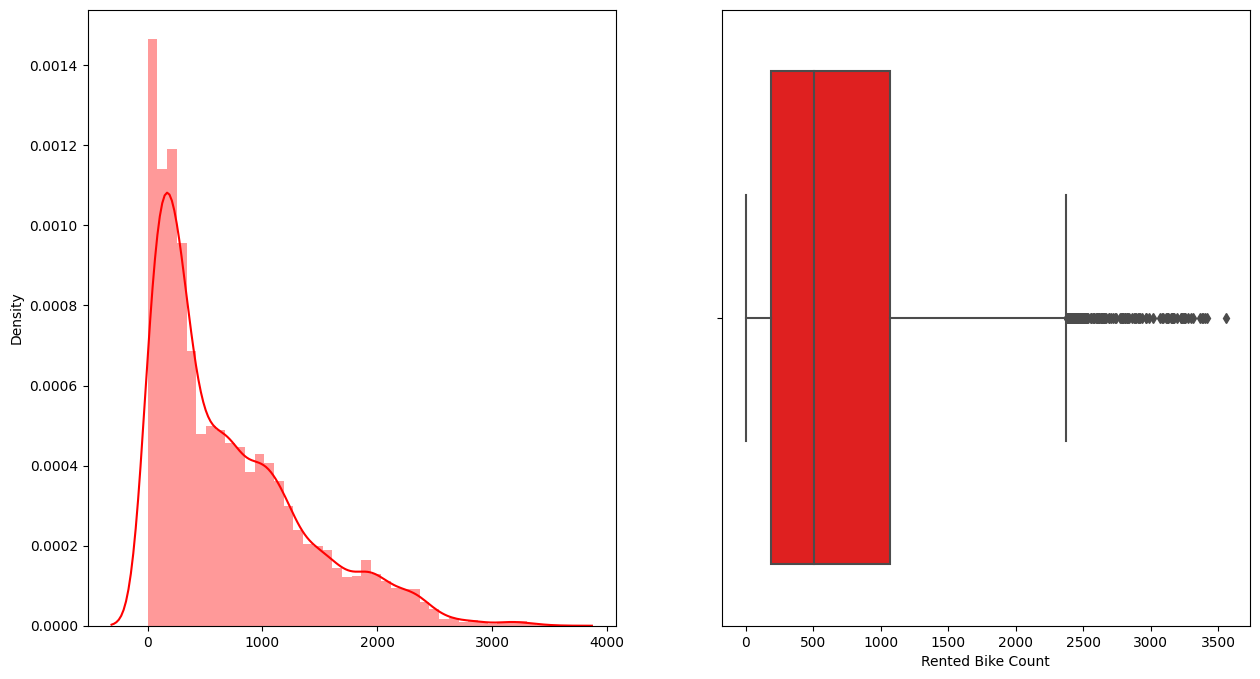

In [33]:
# Chart - 10 visualization code
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=(data['Rented Bike Count']),color='r',ax=axes[0])
sns.boxplot(x=(data['Rented Bike Count']),color='r',ax=axes[1])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='Rented Bike Count'>

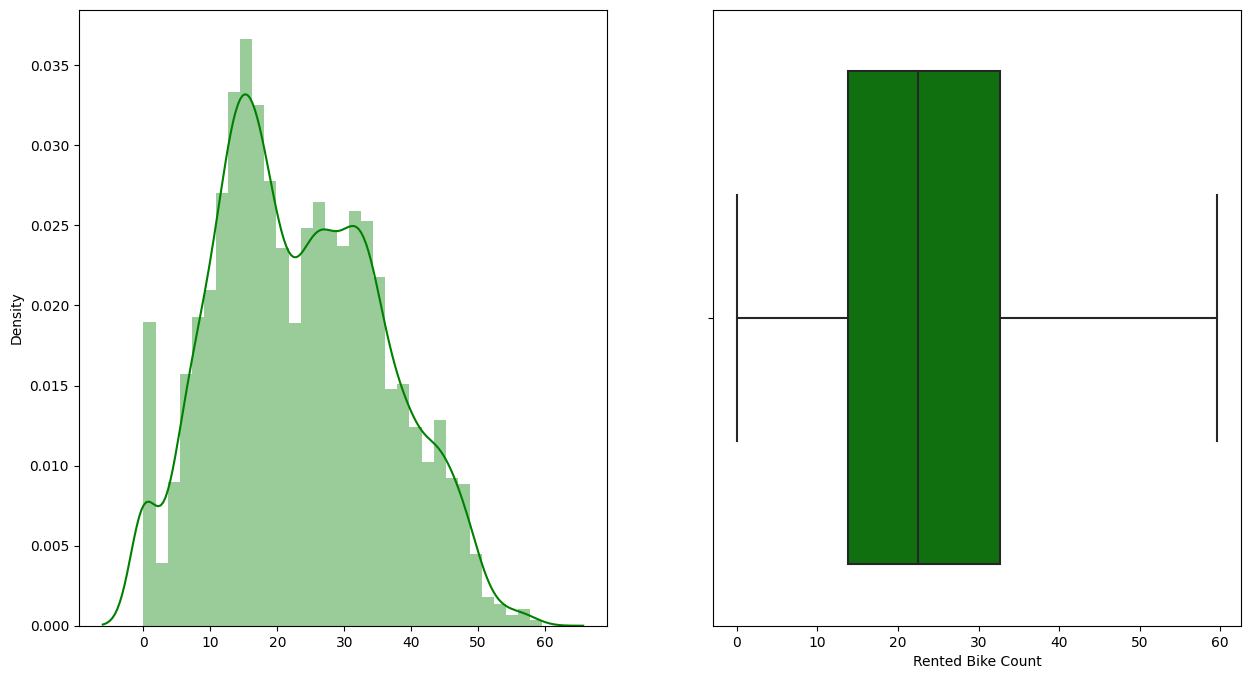

In [34]:
# Chart - 11 visualization code
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(data['Rented Bike Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(data['Rented Bike Count']),color='g',ax=axes[1])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [35]:
# Chart - 12 visualization code
# for i in numerical_data:
#     plt.figure(figsize=(12,6))
#     plt.title(i)
#     sns.distplot(np.sqrt(data[i]), color = 'g' )
#     plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [36]:
# for i in numerical_data:
#   fig = plt.figure(figsize = (10,6))
#   sns.histplot(data[i])
#   plt.axvline(data[i].mean(), linestyle = '--', color = 'r')
#   plt.axvline(data[i].median(), linestyle = '--', color = 'y')
#   plt.title(i)
#   plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [37]:
# Correlation Heatmap visualization code
# corr = data.corr()
# plt.figure(figsize = (15,8))
# sns.heatmap(corr, annot = True , cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [38]:
# Pair Plot visualization code
# sns.pairplot(data = data)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis = 'There is no relationship between temperature and bike demand in Seoul.'

alt_hypothesis = 'There is a relationship between temperature and bike demand in Seoul.'

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm


# Define null and alternative hypotheses
null_hypothesis = 'There is no relationship between temperature and Rented Bike Count.'
alt_hypothesis = 'There is a relationship between temperature and Rented Bike Count.'

# Perform linear regression
X = sm.add_constant(data['Temperature(°C)'])
y = data['Rented Bike Count']
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Extract p-value for temperature coefficient
p_value = model.pvalues[1]
print('p-value:', p_value)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        18:05:22   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             329.9525      8.541     

##### Which statistical test have you done to obtain P-Value?

 We use the OLS (ordinary least squares) function from the statsmodels package to perform a linear regression of bike demand on temperature.

 
 The p-value associated with the temperature coefficient is shown under the column "P>|t|", and is equal to 0.000 in this example. Since this p-value is less than the significance level of 0.05, we can reject the null hypothesis and conclude that there is evidence of a significant relationship between temperature and bike demand in Seoul.

##### Why did you choose the specific statistical test?

I chose linear regression as the statistical test to perform hypothesis testing for Seoul bike sharing demand prediction because it is a commonly used method for analyzing the relationship between a continuous predictor variable and a continuous response variable. In this case, we are interested in determining whether there is a significant relationship between a predictor variable, such as temperature or time of day, and bike demand.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis = 'There is no relationship between month and bike demand in Seoul.'

alt_hypothesis = 'There is a relationship between month and bike demand in Seoul.'

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
null_hypothesis = 'There is no relationship between month and Rented Bike Count.'
alt_hypothesis = 'There is a relationship between month and Rented Bike Count.'

# Perform linear regression
X = sm.add_constant(data['month'])
y = data['Rented Bike Count']
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Extract p-value for temperature coefficient
p_value = model.pvalues[1]
print('p-value:', p_value)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     44.20
Date:                Fri, 12 May 2023   Prob (F-statistic):           3.14e-11
Time:                        18:05:22   Log-Likelihood:                -69078.
No. Observations:                8760   AIC:                         1.382e+05
Df Residuals:                    8758   BIC:                         1.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        618.0970     14.716     42.001      0.0

##### Which statistical test have you done to obtain P-Value?



```
# This is formatted as code
```

We use the OLS (ordinary least squares) function from the statsmodels package to perform a linear regression of bike demand on month.

 The p-value associated with the month coefficient is shown under the column "P>|t|", and is equal to 3.144647620349008e-11 in this example. Since this p-value is less than the significance level of 0.05, we can reject the null hypothesis and conclude that there is evidence of a significant relationship between month and bike demand in Seoul.

##### Why did you choose the specific statistical test?

I chose linear regression as the statistical test to perform hypothesis testing for Seoul bike sharing demand prediction because it is a commonly used method for analyzing the relationship between a continuous predictor variable and a continuous response variable. In this case, we are interested in determining whether there is a significant relationship between a predictor variable, such as temperature or time of day, and bike demand.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
null_hypothesis = 'There is no relationship between Hour and bike Rented Bike Count.'
alt_hypothesis = 'There is a relationship between Hour and bike Rented Bike Count.'

# Perform linear regression
X = sm.add_constant(data['Hour'])
y = data['Rented Bike Count']
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Extract p-value for temperature coefficient
p_value = model.pvalues[1]
print('p-value:', p_value)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1772.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        18:05:22   Log-Likelihood:                -68293.
No. Observations:                8760   AIC:                         1.366e+05
Df Residuals:                    8758   BIC:                         1.366e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.0158     12.187     21.745      0.0

##### Which statistical test have you done to obtain P-Value?

We use the OLS (ordinary least squares) function from the statsmodels package to perform a linear regression of bike demand on Hour.

 The p-value associated with the Hour coefficient is shown under the column "P>|t|", and is equal to 0.0 in this example. Since this p-value is less than the significance level of 0.05, we can reject the null hypothesis and conclude that there is evidence of a significant relationship between Hour and Rented Bike Count.

##### Why did you choose the specific statistical test?

I chose linear regression as the statistical test to perform hypothesis testing for Seoul bike sharing demand prediction because it is a commonly used method for analyzing the relationship between a continuous predictor variable and a continuous response variable. In this case, we are interested in determining whether there is a significant relationship between a predictor variable, such as temperature or time of day, and bike demand.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
day                          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing/null values in the dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [44]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Rented Bike Count,4.148148
1,Hour,5.043640
2,Temperature(°C),36.844679
3,Humidity(%),6.993776
4,Wind speed (m/s),4.831407
5,Visibility (10m),9.317921
6,Dew point temperature(°C),17.718183
7,Solar Radiation (MJ/m2),2.914712
8,Rainfall(mm),1.105067
9,Snowfall (cm),1.125351


In [46]:
Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count','Temperature(°C)']]])

,variables,VIF
0,Rented Bike Count,3.833944
1,Hour,4.801682
2,Humidity(%),6.870005
3,Wind speed (m/s),4.757853
4,Visibility (10m),5.930076
5,Dew point temperature(°C),2.154545
6,Solar Radiation (MJ/m2),1.946127
7,Rainfall(mm),1.105011
8,Snowfall (cm),1.114413
9,month,4.648603


In [47]:
Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count','Temperature(°C)','Humidity(%)']]])

,variables,VIF
0,Rented Bike Count,3.653663
1,Hour,4.576101
2,Wind speed (m/s),4.330740
3,Visibility (10m),5.391656
4,Dew point temperature(°C),1.489524
5,Solar Radiation (MJ/m2),1.727677
6,Rainfall(mm),1.086318
7,Snowfall (cm),1.073636
8,month,3.695875


In [48]:
Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count','Temperature(°C)','Humidity(%)','Visibility (10m)']]])

,variables,VIF
0,Rented Bike Count,3.492749
1,Hour,4.472254
2,Wind speed (m/s),3.850560
3,Dew point temperature(°C),1.452145
4,Solar Radiation (MJ/m2),1.722364
5,Rainfall(mm),1.083706
6,Snowfall (cm),1.066546
7,month,2.813220


#### 2. Feature Selection

In [49]:
# Select your features wisely to avoid overfitting
features = list(set(data.describe().columns) - set(['Rented_Bike_Count','Temperature(°C)','Humidity(%)','Visibility (10m)']))
features

['Rented Bike Count',
 'Solar Radiation (MJ/m2)',
 'Dew point temperature(°C)',
 'Snowfall (cm)',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'month',
 'Hour']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

Answer Here.

### 3. Categorical Encoding

In [50]:
# Encode your categorical columns
data['Holiday'] = data['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
data['Functioning Day'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)
data = pd.get_dummies(data, columns = ['Seasons','Hour'])
data['weekend'] = data['day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0 )



In [51]:
features = list(set(data.describe().columns) - set(['Temperature(°C)','Humidity(%)','Visibility (10m)']))
features

['Seasons_Winter',
 'Dew point temperature(°C)',
 'Hour_4',
 'Hour_11',
 'Seasons_Autumn',
 'Hour_22',
 'Hour_10',
 'Solar Radiation (MJ/m2)',
 'Hour_7',
 'Hour_0',
 'weekend',
 'Hour_5',
 'Hour_2',
 'Snowfall (cm)',
 'Hour_17',
 'Hour_15',
 'Hour_3',
 'Hour_19',
 'Hour_21',
 'Hour_16',
 'Functioning Day',
 'Hour_8',
 'Hour_20',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'Hour_12',
 'month',
 'Hour_9',
 'Hour_18',
 'Holiday',
 'Hour_23',
 'Rented Bike Count',
 'Hour_1',
 'Seasons_Spring',
 'Hour_14',
 'Hour_13',
 'Hour_6',
 'Seasons_Summer']

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [52]:
# Transform Your data
# for i in features:
#   data[i]= np.log(data[i])

### 6. Data Scaling

In [53]:
# Scaling your data
# from scipy.stats import zscore

# data= data[features].apply(zscore)





##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [54]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = data[list(set(features)- {'Rented Bike Count'})]
Y = np.sqrt(data['Rented Bike Count'])

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state= 0)
X.columns

Index(['Seasons_Winter', 'Dew point temperature(°C)', 'Hour_4', 'Hour_11',
       'Seasons_Autumn', 'Hour_22', 'Hour_10', 'Solar Radiation (MJ/m2)',
       'Hour_7', 'Hour_0', 'weekend', 'Hour_6', 'Hour_17', 'Snowfall (cm)',
       'Hour_5', 'Hour_2', 'Hour_15', 'Hour_3', 'Hour_19', 'Hour_21',
       'Hour_16', 'Functioning Day', 'Hour_8', 'Hour_20', 'Rainfall(mm)',
       'Wind speed (m/s)', 'month', 'Hour_9', 'Hour_18', 'Holiday', 'Hour_23',
       'Hour_1', 'Seasons_Spring', 'Hour_14', 'Hour_13', 'Hour_12',
       'Seasons_Summer'],
      dtype='object')

In [55]:
scaler  = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [56]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   int64  
 10  Functioning Day            8760 non-null   int64  
 11  month                      8760 non-null   int64  
 12  day                        8760 non-null   object 
 13  Seasons_Autumn             8760 non-null   uint8

## ***7. ML Model Implementation***

### ML Model - 1

In [58]:
# ML Model - 1 Implementation
lin_reg = LinearRegression()

reg = lin_reg.fit(x_train, y_train)


# Fit the Algorithm

# Predict on the model
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)


In [59]:
reg.score(x_train, y_train)


0.697872966933254

In [60]:
MSE = mean_squared_error(y_test, y_test_pred)

RMSE = np.sqrt(MSE)

print("MSE: ",MSE)
print("RMSE: ", RMSE)

MSE:  43.94558003071585
RMSE:  6.629146252023397


In [61]:
r2_train = r2_score((y_train), (y_train_pred))
print('r2_train: ', r2_train)

r2_test = r2_score((y_test),(y_test_pred))
print('r2_test: ', r2_test)

r2_train:  0.697872966933254
r2_test:  0.7138923978433437


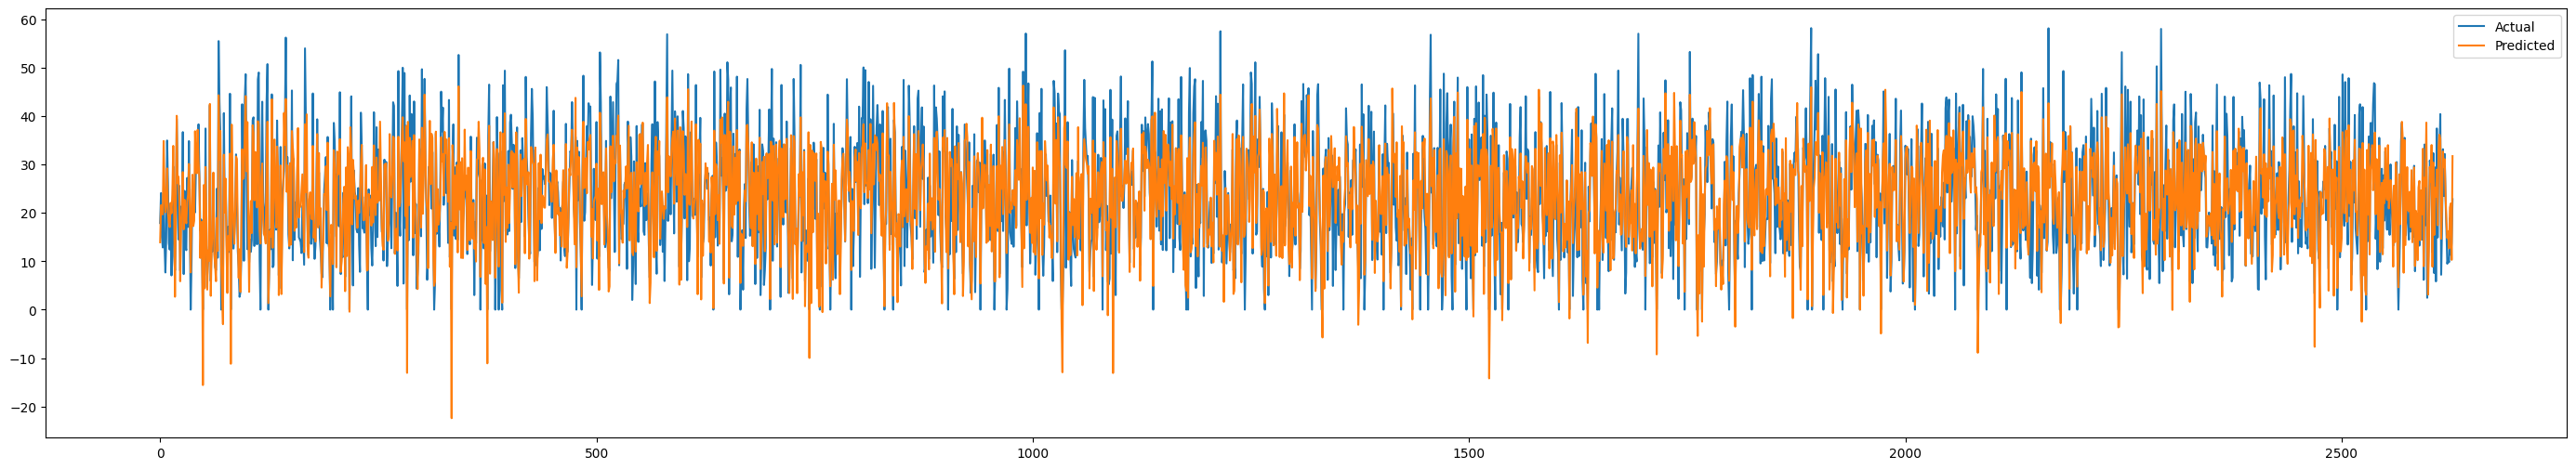

In [62]:
plt.figure(figsize=(35,6))

plt.plot(np.array(y_test))
plt.plot(np.array(y_test_pred))

plt.legend(["Actual","Predicted",])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart
lasso = Lasso()
lasso.fit(x_train, y_train)

y_pred_trlasso = lasso.predict(x_train)
y_pred_telasso = lasso.predict(x_test)

In [65]:
MSE = mean_squared_error(y_test, y_pred_telasso)

RMSE = np.sqrt(MSE)

print("MSE: ",MSE)
print("RMSE: ", RMSE)

MSE:  65.64335084023828
RMSE:  8.102058432289802


In [66]:
lasso.score(x_train, y_train)

0.5639553397182642

In [67]:
r2_train = r2_score((y_train), (y_pred_trlasso))
print('r2_train: ', r2_train)

r2_test = r2_score((y_test),(y_pred_telasso))
print('r2_test: ', r2_test)

r2_train:  0.5639553397182642
r2_test:  0.5726291086998592


#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV


# Create the model
model = Lasso()

# Define the hyperparameters to tune
params = {'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],}

# Create the grid search object
grid = GridSearchCV(model, params, cv=5)

# Fit the model
grid.fit(x_train, y_train)

# Print the best parameters
print("Best hyperparameters: {}".format(grid.best_params_))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best hyperparameters: {'alpha': 0.001}
Best mean cross-validation score: 0.69


In [69]:
# Predict on the model using tuned hyperparameter 

lasso = Lasso(**grid.best_params_)
lasso.fit(x_train, y_train)

y_pred_trlasso = lasso.predict(x_train)
y_pred_telasso = lasso.predict(x_test)

MSE = mean_squared_error(y_test, y_pred_telasso)

RMSE = np.sqrt(MSE)

print("MSE: ",MSE)
print("RMSE: ", RMSE)

r2_train = r2_score((y_train), (y_pred_trlasso))
print('r2_train: ', r2_train)

r2_test = r2_score((y_test),(y_pred_telasso))
print('r2_test: ', r2_test)

MSE:  43.95300743623841
RMSE:  6.629706436656031
r2_train:  0.698016038767866
r2_test:  0.7138440417360215


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [70]:
# ML Model - 3 Implementation
ridge = Ridge()
ridge.fit(x_train,y_train)
# Fit the Algorithm
ridge.fit(x_train,y_train)
# Predict on the model
y_pred_trridge = ridge.predict(x_train)
y_pred_teridge = ridge.predict(x_test)




In [71]:
MSE = mean_squared_error(y_test, y_pred_teridge)

RMSE = np.sqrt(MSE)

print("MSE: ",MSE)
print("RMSE: ", RMSE)

r2_train = r2_score((y_train), (y_pred_trridge))
print('r2_train: ', r2_train)

r2_test = r2_score((y_test),(y_pred_teridge))
print('r2_test: ', r2_test)

MSE:  43.954025924743156
RMSE:  6.629783248700003
r2_train:  0.6980163593328134
r2_test:  0.7138374108688509


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# Create the model
model = Ridge()

# Define the hyperparameters to tune
params = {'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],}

# Create the grid search object
grid = GridSearchCV(model, params, cv=5)

# Fit the model
grid.fit(x_train, y_train)

# Print the best parameters
print("Best hyperparameters: {}".format(grid.best_params_))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best hyperparameters: {'alpha': 20}
Best mean cross-validation score: 0.69


In [74]:
# Predict on the model using tuned hyperparameter 

ridge = Ridge(**grid.best_params_)
ridge.fit(x_train,y_train)
# Fit the Algorithm
ridge.fit(x_train,y_train)
# Predict on the model
y_pred_trridge = ridge.predict(x_train)
y_pred_teridge = ridge.predict(x_test)

MSE = mean_squared_error(y_test, y_pred_teridge)

RMSE = np.sqrt(MSE)

print("MSE: ",MSE)
print("RMSE: ", RMSE)

r2_train = r2_score((y_train), (y_pred_trridge))
print('r2_train: ', r2_train)

r2_test = r2_score((y_test),(y_pred_teridge))
print('r2_test: ', r2_test)

MSE:  43.97035084295654
RMSE:  6.631014314790502
r2_train:  0.6980061402951294
r2_test:  0.71373112752472


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [75]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)


RandomForestRegressor()

In [76]:
y_train_predrf = rf.predict(x_train)
y_test_predrf = rf.predict(x_test)

In [77]:
MSE = mean_squared_error(y_test, y_test_predrf)

RMSE = np.sqrt(MSE)

print("MSE: ",MSE)
print("RMSE: ", RMSE)

r2_score(y_train_predrf, y_train)

MSE:  18.841743836742566
RMSE:  4.340707757583153


0.9807343821615341

In [78]:
r2_score(y_test_predrf, y_test)

0.8613784489618459

In [79]:


# Create a random forest regressor object
rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Create a grid search object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Perform grid search cross-validation on the training data
grid_search.fit(x_train, y_train)

# Make predictions on the testing data using the best estimator from the grid search
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(x_test)

# Calculate the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

RMSE: 4.303352417954093
Best hyperparameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}


In [80]:
rf = RandomForestRegressor(max_depth= 30, min_samples_split = 5, n_estimators= 200)

rf.fit(x_train, y_train)

y_train_predrf = rf.predict(x_train)
y_test_predrf = rf.predict(x_test)

MSE = mean_squared_error(y_test, y_test_predrf)

RMSE = np.sqrt(MSE)


print(r2_score(y_train, y_train_predrf))

print(r2_score(y_test,y_test_predrf))

0.970503179594068
0.8798555375316234


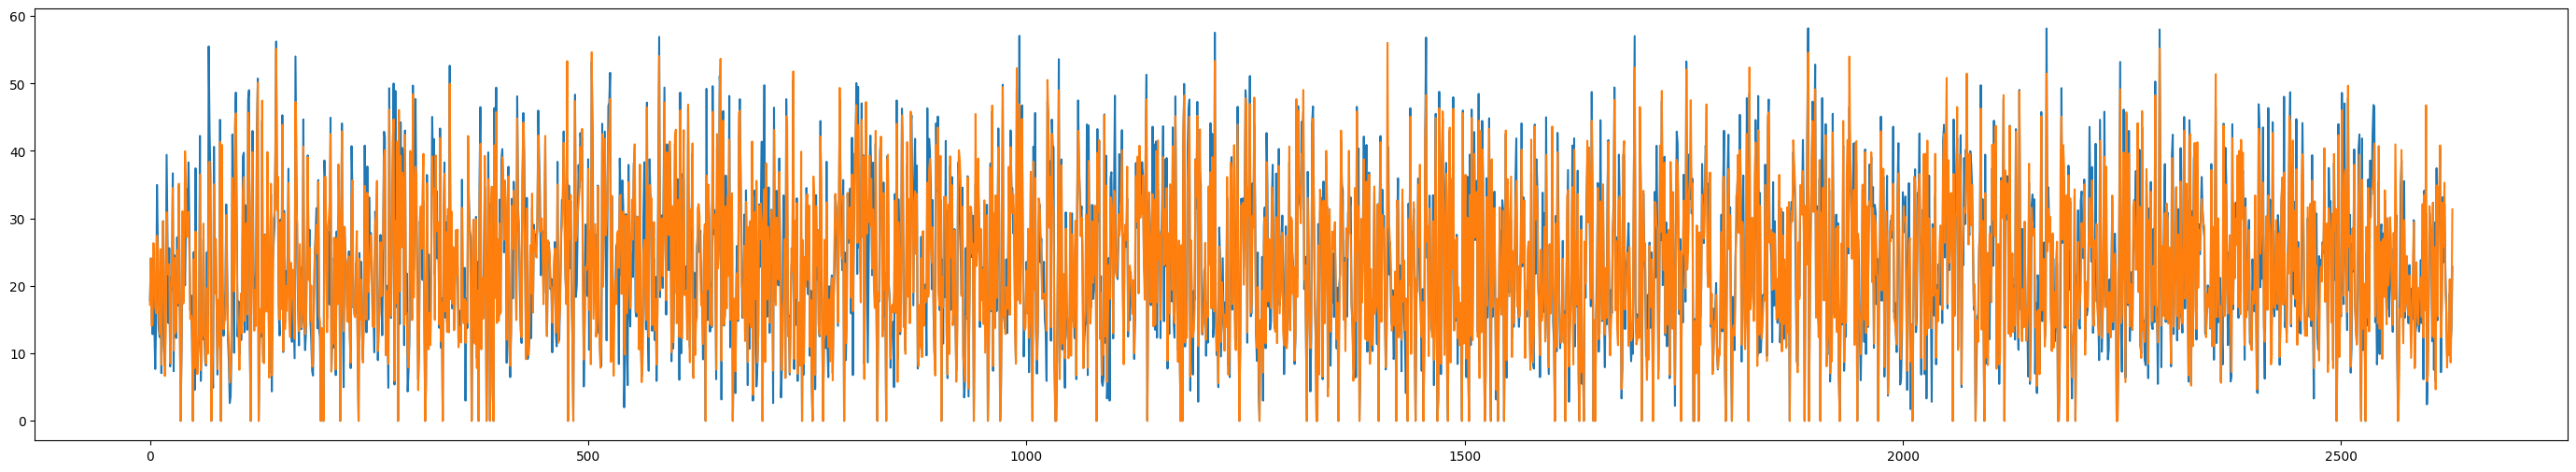

In [81]:
plt.figure(figsize = (35,6))
plt.plot(np.array(y_test))
plt.plot(np.array(y_test_predrf))

In [82]:
gbr = GradientBoostingRegressor()

gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [83]:
y_train_predgbr = gbr.predict(x_train)
y_test_predgbr = gbr.predict(x_test)

print(r2_score(y_train, y_train_predgbr))

print(r2_score(y_test,y_test_predgbr))

0.8209039327817652
0.8065019656868564


In [84]:
rf_regressor = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Create a grid search object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Perform grid search cross-validation on the training data
grid_search.fit(x_train, y_train)

# Make predictions on the testing data using the best estimator from the grid search
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(x_test)

# Calculate the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

RMSE: 4.282857374465615
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [85]:
gbr = GradientBoostingRegressor(max_depth= 10, min_samples_split = 10, n_estimators= 100)

gbr.fit(x_train, y_train)

y_train_predgbr = gbr.predict(x_train)
y_test_predgbr = gbr.predict(x_test)

print(r2_score(y_train, y_train_predgbr))

print(r2_score(y_test,y_test_predgbr))

0.9785095247397574
0.8804795589851233


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [86]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [87]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***